## Simple solutions to the EFE

Here, we want to establish some simple solutions to the EFE.

### Flat minkowski space
$$
ds^2 = - dt^2 + dx^2 + dy^2 + dz^2 = -dt^2 + dr^2 + r^2 \left( d\theta^2 + \sin^2\theta d\varphi^2\right)
$$


The simplest next generalization is to itnroduce some parameters.  For example, let's introduce a time dilation $\alpha$ as well as some other, although only _centrally symmetric_, parameters $\beta,\:\gamma$:

$$
ds^2 = -\alpha dt^2 + \beta dr^2 + \gamma r^2 \left( d\theta^2 + \sin^2\theta d\varphi^2\right)
$$

Let's play around with sympy's diffgeo-module for a while.

In [58]:
from sympy import Function, symbols, sin, cos, roots
from sympy.diffgeom import Manifold, Patch, CoordSystem, Differential, \
    metric_to_Christoffel_1st, metric_to_Christoffel_2nd, \
    metric_to_Riemann_components, metric_to_Ricci_components, \
    TensorProduct as TP, twoform_to_matrix
from sympy.interactive import init_printing
from sympy.matrices import Matrix, eye, diag
from sympy import mpmath
init_printing()

In [3]:
g = Function('g')
x, y, z, t = symbols('x y z t')
field = g(t, x, y, z)
dg = Differential(field)
print(dg)

d(g(t, x, y, z))


In [5]:
m = Manifold('m', 3)
p = Patch('p', m)
rect = CoordSystem('rect', p, ['x', 'y', 'z'])
polar = CoordSystem('polar', p, ['r', 'θ', 'φ'])
dx, dy, dz = rect.base_oneforms()
r, θ, φ = symbols('r θ φ')
polar.connect_to(rect, [r, θ, φ], [r * sin(θ) * cos(φ), r * sin(θ) * sin(φ), r * cos(θ)], inverse=False)

In [6]:
dr, dθ, dφ = polar.base_oneforms()
polar.coord_functions()

### Short test
Let's test whether our tiny little coordinate transformation was correct by having a look at the jacobian:

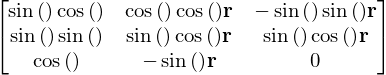

In [7]:
j = polar.jacobian(rect, polar.coord_functions())
j

In [8]:
j.det().simplify()

In [10]:
g = TP(dx, dx) + TP(dy, dy) + TP(dz, dz)

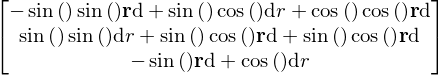

In [11]:
v = Matrix(3, 1, polar.base_oneforms())
metric = j * v
metric.simplify()
metric

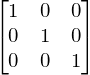

In [14]:
# Building the minkowski metric
eta = diag(eye(3))
eta

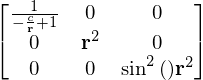

In [35]:
# polar_g = (j.transpose() * eta * j).applyfunc(lambda x: x.simplify())
r = polar.coord_functions()[0]
c = symbols('c')
polar_g = diag(1/(1-c/r), r**2, sin(θ)**2 * r**2)
polar_g

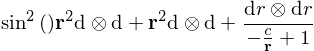

In [21]:
# polar_forms_vector = Matrix(3, 1, polar.base_oneforms())
# doesn't work TensorProduct(polar_forms_vector, polar_forms_vector)
metric = sum(polar_g[i,i] * TP(polar.base_oneform(i), polar.base_oneform(i)) for i in range(3))
metric

In [121]:
riemann_raw = metric_to_Riemann_components(metric)
riemann = riemann_raw.applyfunc(lambda x: x.simplify())
for i in range(3):
    for j in range(3):
        print(riemann[i, j, :, :].tomatrix())


Matrix([[0, 0, 0], [0, 0, 0], [0, 0, 0]])
Matrix([[0, -c/(2*r), 0], [c/(2*r), 0, 0], [0, 0, 0]])
Matrix([[0, 0, -c*sin(θ)**2/(2*r)], [0, 0, 0], [c*sin(θ)**2/(2*r), 0, 0]])
Matrix([[0, c/(2*(-c + r)*r**2), 0], [c/(2*(c - r)*r**2), 0, 0], [0, 0, 0]])
Matrix([[0, 0, 0], [0, 0, 0], [0, 0, 0]])
Matrix([[0, 0, 0], [0, 0, (c - r)*sin(θ)**2/r], [0, (-c + r)*sin(θ)**2/r, 0]])
Matrix([[0, 0, c/(2*(-c + r)*r**2)], [0, 0, 0], [c/(2*(c - r)*r**2), 0, 0]])
Matrix([[0, 0, 0], [0, 0, (-c + r)/r], [0, (c - r)/r, 0]])
Matrix([[0, 0, 0], [0, 0, 0], [0, 0, 0]])


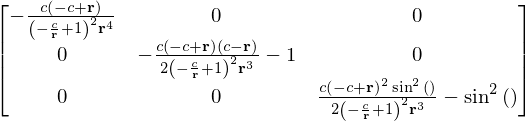

In [38]:
ricci_raw = metric_to_Ricci_components(metric).tomatrix()
ricci_raw

The Ricci-Tensor is not zero anymore!
Let's simplify:

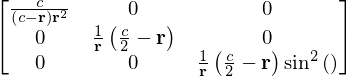

In [39]:
ricci = ricci_raw.applyfunc(lambda x: x.simplify())
ricci

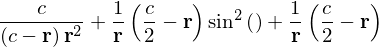

In [37]:
R = ricci.trace()
R

In [122]:
G, M, c_ = symbols('G M c')

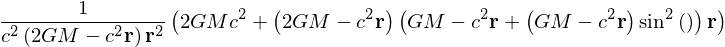

In [127]:
R.subs({c: 2*G*M/(c**2)}).simplify()